In [ ]:
# Read the data in data/Airline_Delay_Cause.csv into a pandas dataframe.
# Once the data is read, print the first 5 rows.
# Print the shape of the dataframe.
# Print the column names.
# Print the data type of each column.
# Print the summary statistics of each column.
# Print the number of missing values in each column.
# Print the number of rows with missing values.
# Print the number of rows with missing values in each column.
# Scale the data using the StandardScaler.



In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [15]:
# Read the data into a pandas dataframe
df = pd.read_csv('data/Airline_Delay_Cause.csv')

# Print the first 5 rows
print(df.head())

# Print the shape of the dataframe
print(df.shape)

# Print the column names
print(df.columns)

# Print the data type of each column
print(df.dtypes)

# Print the summary statistics of each column
print(df.describe())

# Print the number of missing values in each column
print(df.isnull().sum())

# Print the number of rows with missing values
print(df.isnull().any(axis=1).sum())

# Print the number of rows with missing values in each column
print(df.isnull().sum(axis=0))

   year  month carrier       carrier_name airport  \
0  2023      8      9E  Endeavor Air Inc.     ABE   
1  2023      8      9E  Endeavor Air Inc.     ABY   
2  2023      8      9E  Endeavor Air Inc.     AEX   
3  2023      8      9E  Endeavor Air Inc.     AGS   
4  2023      8      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         89.0       13.0   
1             Albany, GA: Southwest Georgia Regional         62.0       10.0   
2           Alexandria, LA: Alexandria International         62.0       10.0   
3        Augusta, GA: Augusta Regional at Bush Field         66.0       12.0   
4                   Albany, NY: Albany International         92.0       22.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.25        1.60  ...          0.0              5.99            2.0   
1        1.97        0.04  ...          

In [16]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
scaled_columns = scaler.fit_transform(numeric_columns)

# Create a new DataFrame with the scaled data
df_scaled = df.copy()

# Replace the original numeric columns with the scaled ones
df_scaled[numeric_columns.columns] = scaled_columns

print(df_scaled.head())

       year     month carrier       carrier_name airport  \
0  1.620745  0.439018      9E  Endeavor Air Inc.     ABE   
1  1.620745  0.439018      9E  Endeavor Air Inc.     ABY   
2  1.620745  0.439018      9E  Endeavor Air Inc.     AEX   
3  1.620745  0.439018      9E  Endeavor Air Inc.     AGS   
4  1.620745  0.439018      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...    -0.283773  -0.301322   
1             Albany, GA: Southwest Georgia Regional    -0.310199  -0.316388   
2           Alexandria, LA: Alexandria International    -0.310199  -0.316388   
3        Augusta, GA: Augusta Regional at Bush Field    -0.306284  -0.306344   
4                   Albany, NY: Albany International    -0.280837  -0.256126   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0   -0.391273   -0.104362  ...    -0.212774         -0.251786      -0.141663  

In [24]:
# Select only the numeric columns excluding 'year' and 'month'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).drop(['year', 'month'], axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
scaled_columns = scaler.fit_transform(numeric_columns)

# Create a new DataFrame with the scaled data
df_scaled_no_ym = df.copy()

# Replace the original numeric columns with the scaled ones
df_scaled_no_ym[numeric_columns.columns] = scaled_columns

In [25]:
# Original Data

# Adjust display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Print the DataFrame as a string
print(df.head().to_string(index=False))

 year  month carrier      carrier_name airport                                                airport_name  arr_flights  arr_del15  carrier_ct  weather_ct  nas_ct  security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  security_delay  late_aircraft_delay
 2023      8      9E Endeavor Air Inc.     ABE Allentown/Bethlehem/Easton, PA: Lehigh Valley International         89.0       13.0        2.25        1.60    3.16          0.0              5.99            2.0           1.0     1375.0           71.0          761.0      118.0             0.0                425.0
 2023      8      9E Endeavor Air Inc.     ABY                      Albany, GA: Southwest Georgia Regional         62.0       10.0        1.97        0.04    0.57          0.0              7.42            0.0           1.0      799.0          218.0            1.0       62.0             0.0                518.0
 2023      8      9E Endeavor Air Inc.     AEX                  

In [28]:
# Scaled Data

# Adjust display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Print the DataFrame as a string
print(df_scaled_no_ym.head().to_string(index=False))

 year  month carrier      carrier_name airport                                                airport_name  arr_flights  arr_del15  carrier_ct  weather_ct    nas_ct  security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  security_delay  late_aircraft_delay
 2023      8      9E Endeavor Air Inc.     ABE Allentown/Bethlehem/Easton, PA: Lehigh Valley International    -0.283773  -0.301322   -0.391273   -0.104362 -0.245262    -0.212774         -0.251786      -0.141663      0.032896  -0.227154      -0.337175       0.610388  -0.213168       -0.185023            -0.236217
 2023      8      9E Endeavor Air Inc.     ABY                      Albany, GA: Southwest Georgia Regional    -0.310199  -0.316388   -0.396989   -0.261840 -0.276368    -0.212774         -0.232983      -0.196049      0.032896  -0.272124      -0.297915      -0.257380  -0.225508       -0.185023            -0.218012
 2023      8      9E Endeavor Air Inc.     AEX            

In [29]:
# Save the DataFrame to a CSV file
df.head().to_csv('data/scaled.csv', index=False)
df_scaled_no_ym.head().to_csv('data/scaled_no_ym.csv', index=False)

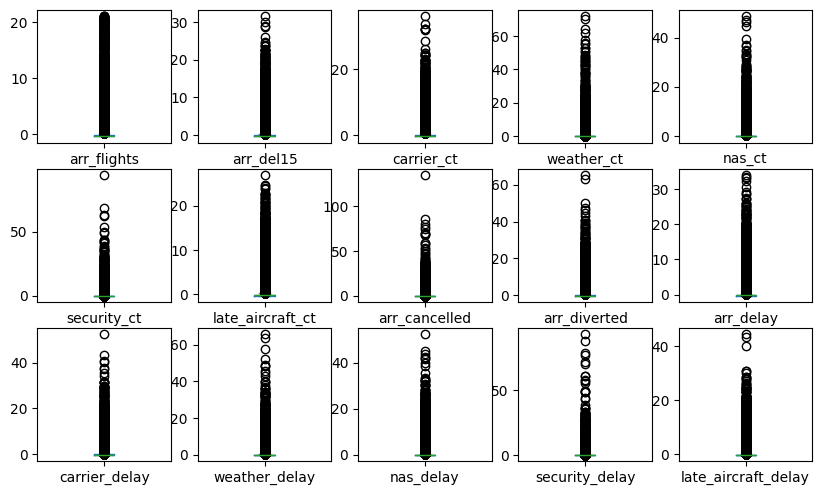

In [31]:
import matplotlib.pyplot as plt

# Drop 'year' and 'month' columns
df_to_plot = df_scaled_no_ym.drop(['year', 'month'], axis=1)

# Plot the remaining columns
df_to_plot.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(10,10))
plt.show()

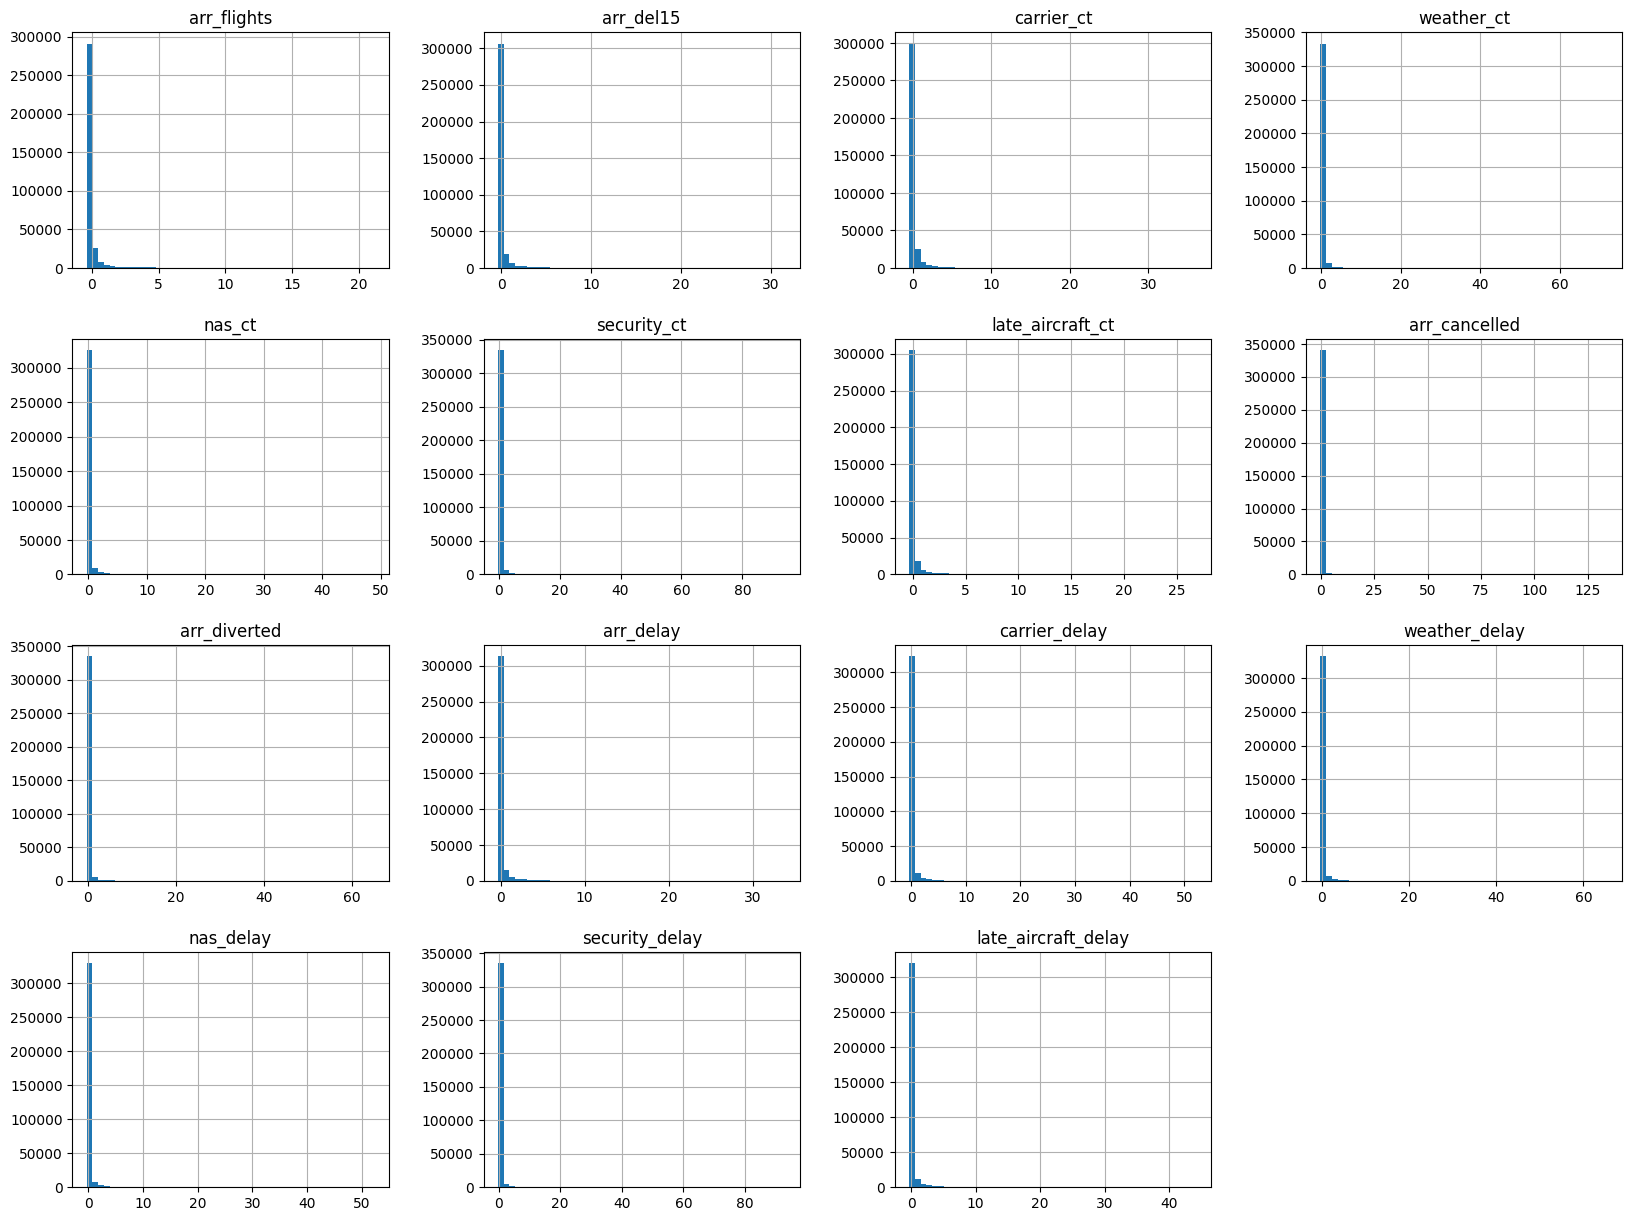

In [33]:
# Drop 'year' and 'month' columns
df_to_plot = df_scaled_no_ym.drop(['year', 'month'], axis=1)

# Plot histograms for the remaining columns
df_to_plot.hist(bins=50, figsize=(20,15))
plt.show()

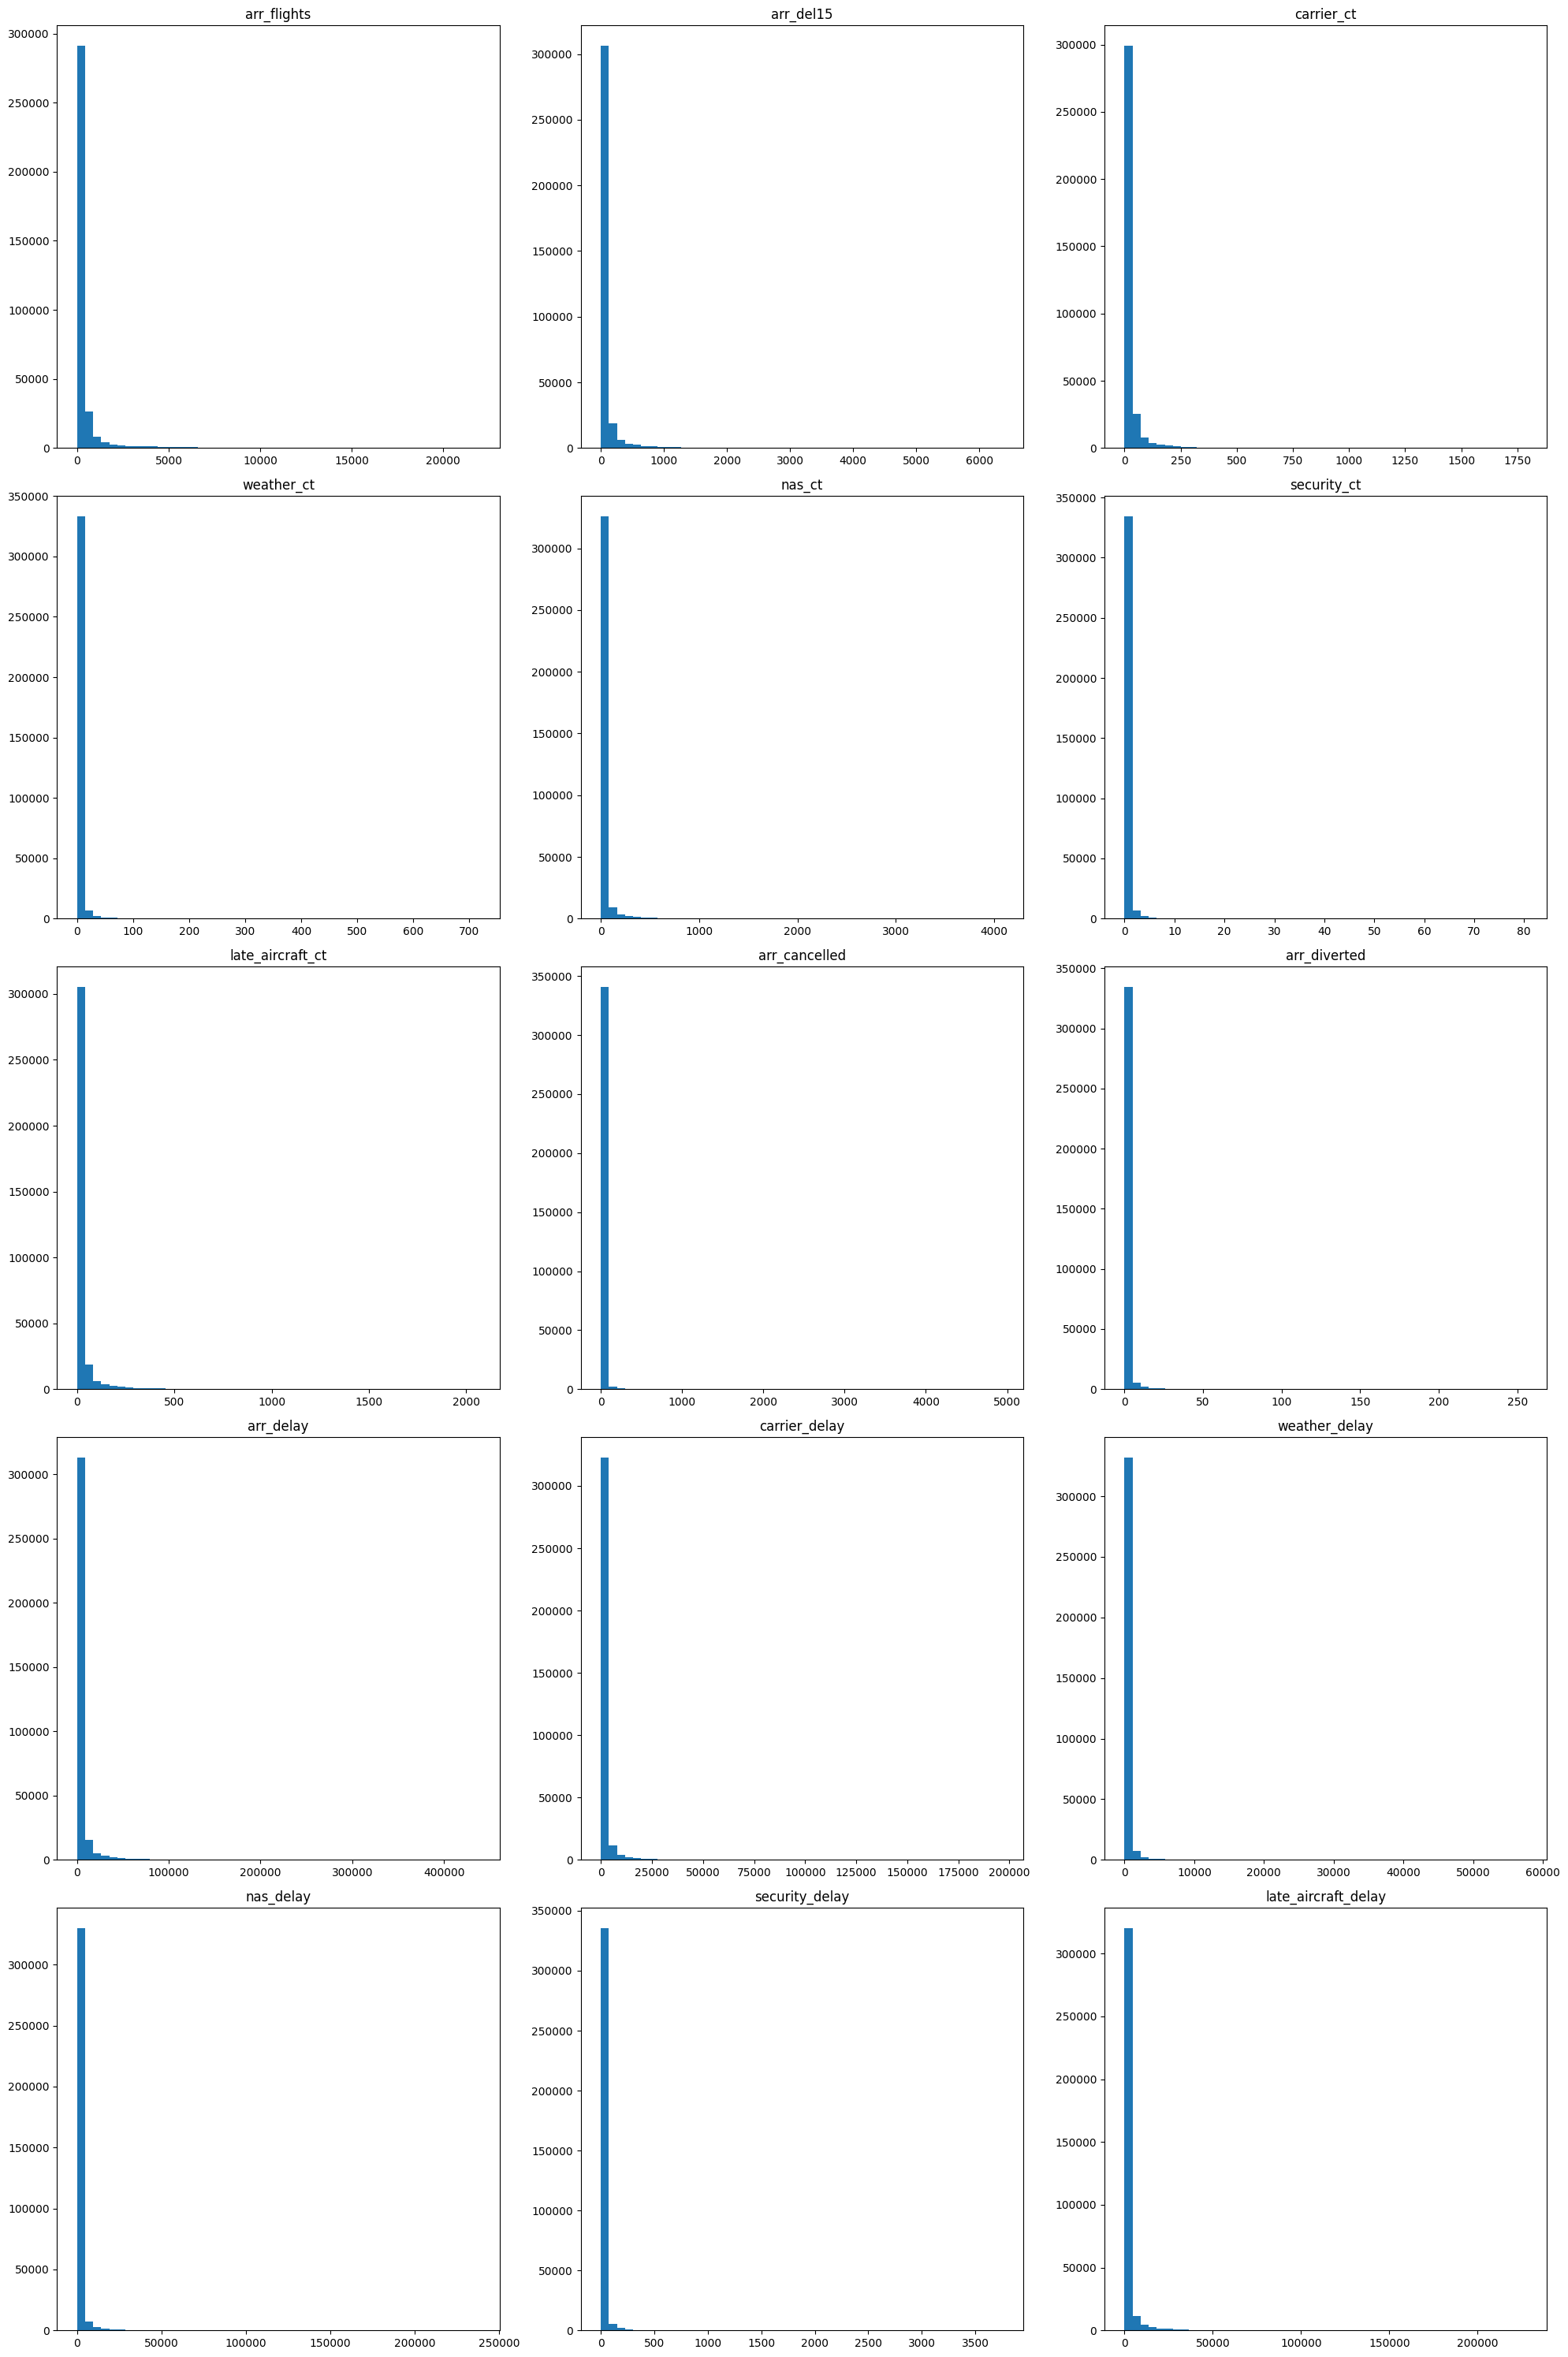

In [43]:
import matplotlib.pyplot as plt

# Select only the numeric columns and drop 'year' and 'month'
df_to_plot = df.select_dtypes(include=['float64', 'int64']).drop(['year', 'month'], axis=1)

# Number of columns for subplot
ncols = 3

# Calculate number of rows needed for subplots
nrows = -(-len(df_to_plot.columns) // ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 30))

# Flatten the axes array and iterate over it and the columns of the DataFrame simultaneously
for ax, column in zip(axs.flatten(), df_to_plot.columns):
    ax.hist(df_to_plot[column], bins=50)
    ax.set_title(column)

# Remove any unused subplots
for ax in axs.flatten()[len(df_to_plot.columns):]:
    ax.remove()

plt.tight_layout()
plt.show()

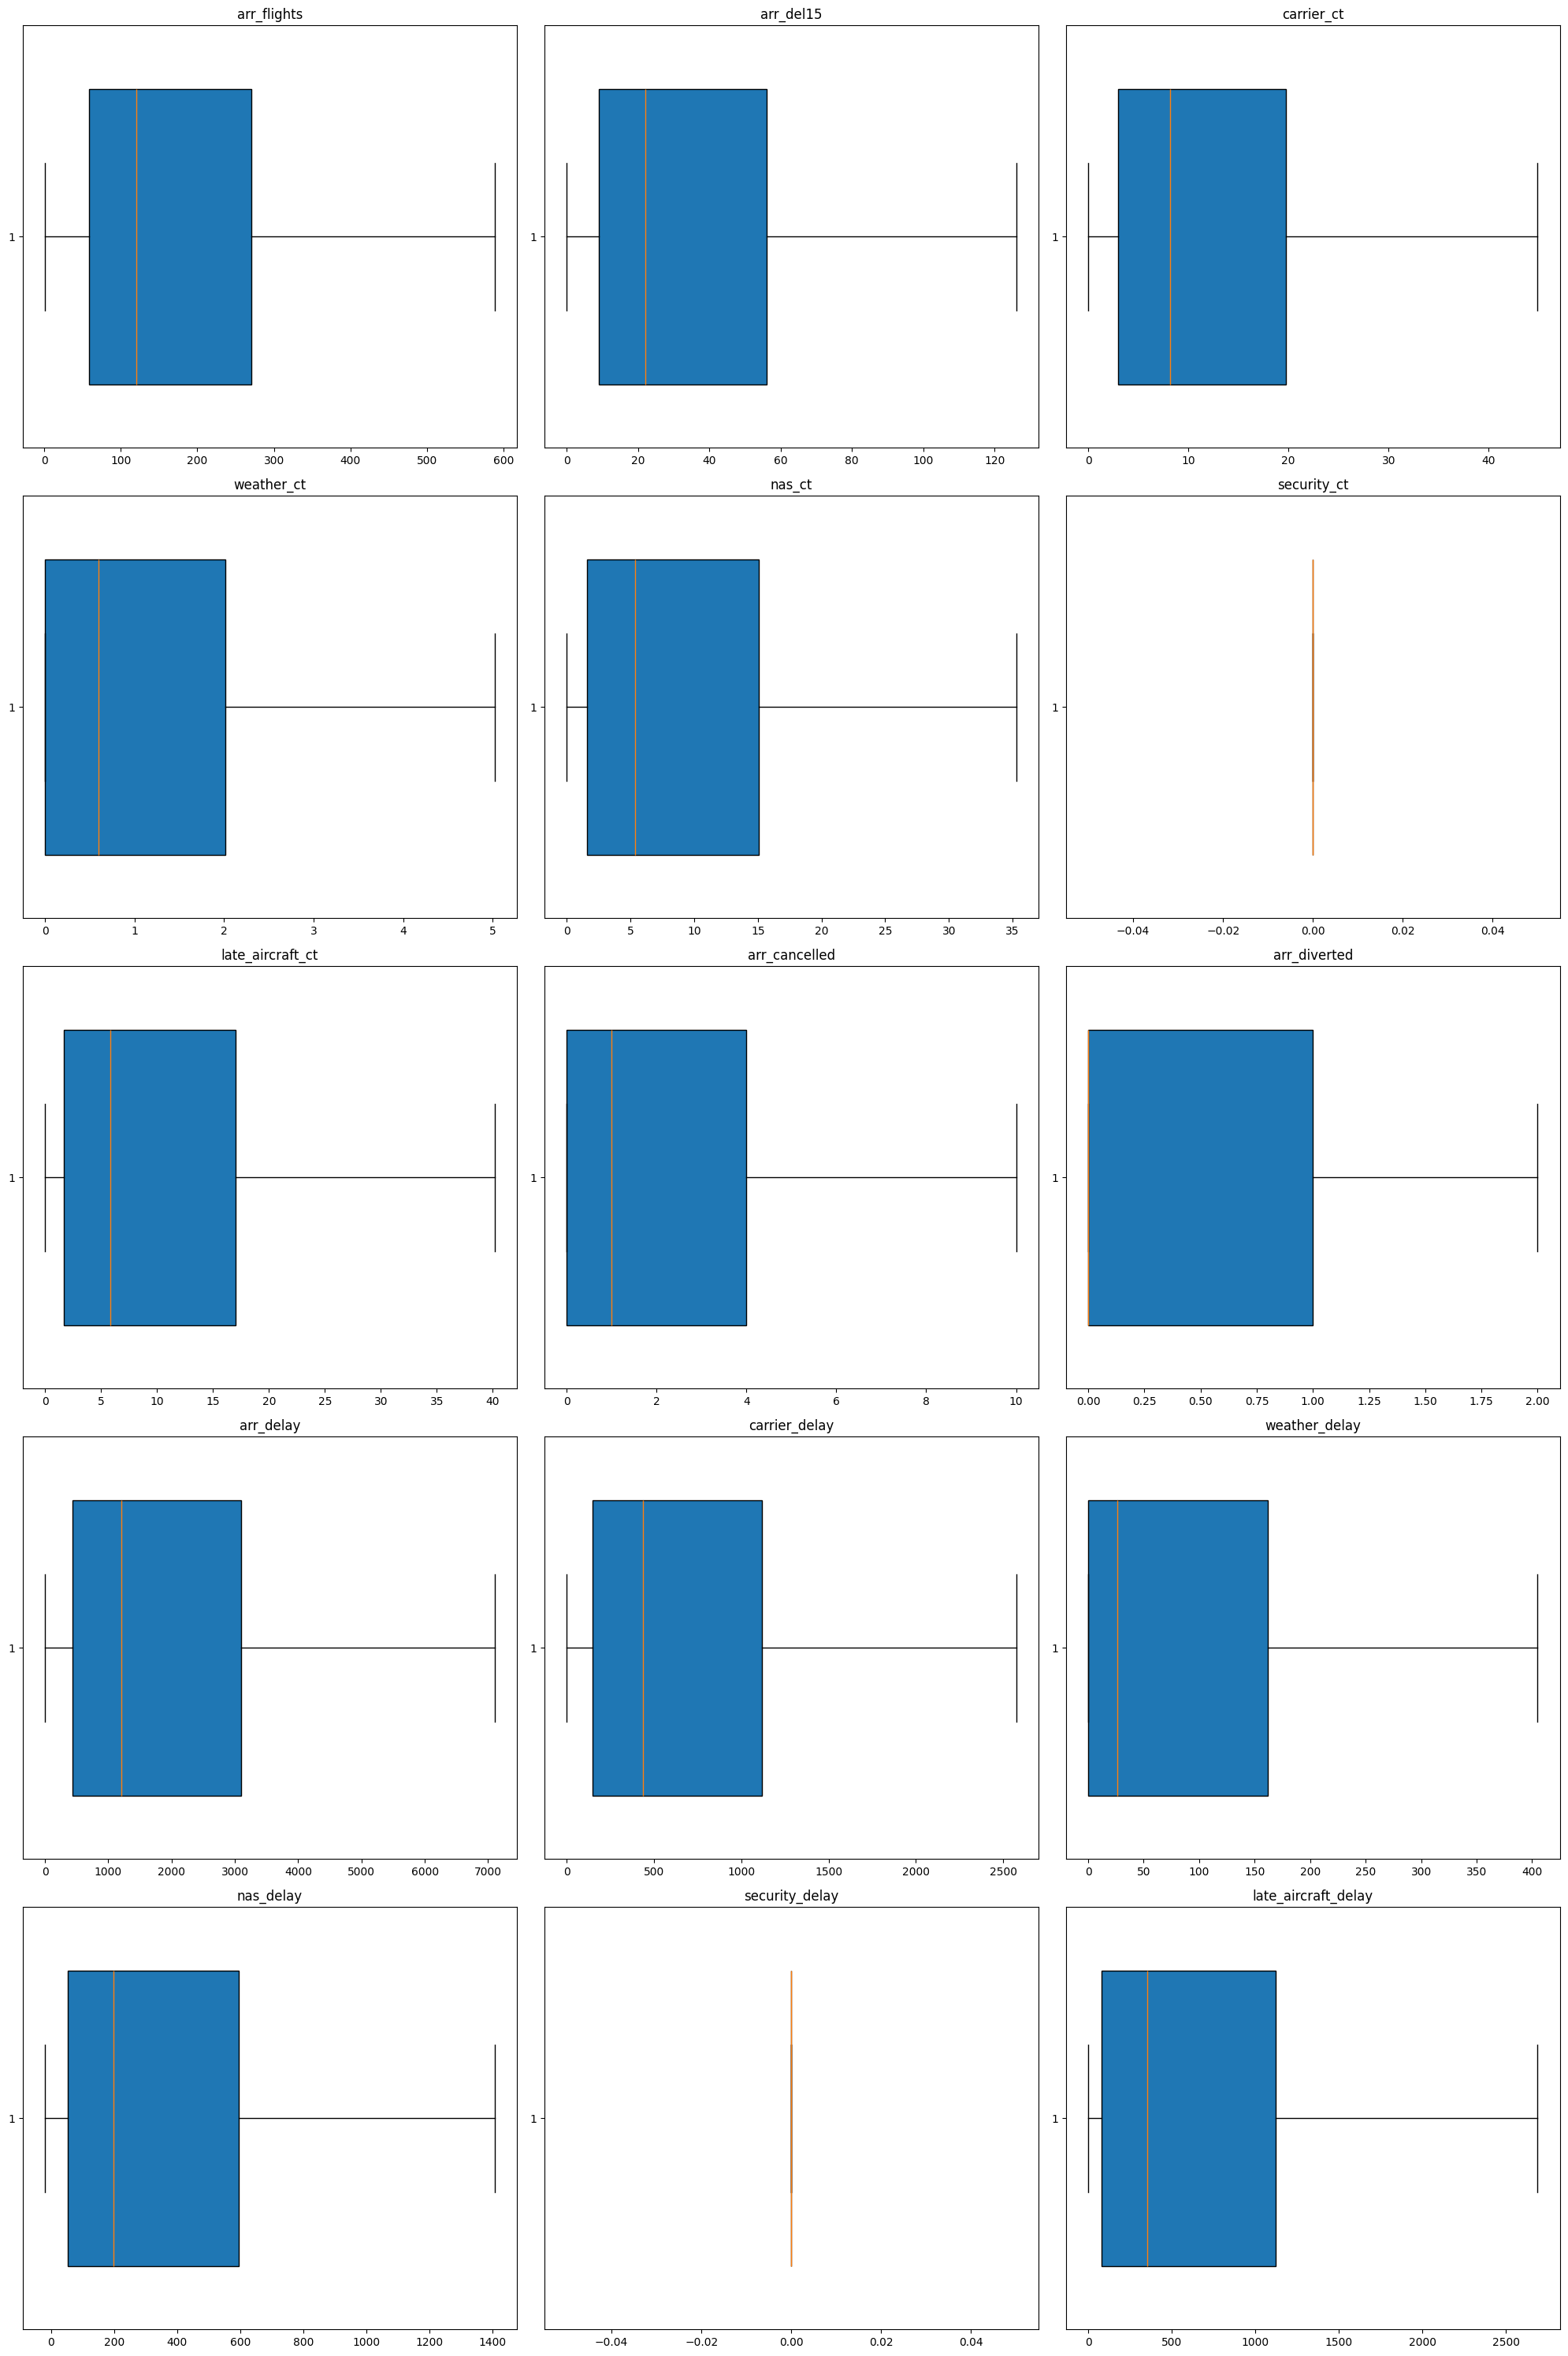

In [44]:
import matplotlib.pyplot as plt

# Select only the numeric columns and drop 'year' and 'month'
df_to_plot = df.select_dtypes(include=['float64', 'int64']).drop(['year', 'month'], axis=1)

# Number of columns for subplot
ncols = 3

# Calculate number of rows needed for subplots
nrows = -(-len(df_to_plot.columns) // ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 30))

# Flatten the axes array and iterate over it and the columns of the DataFrame simultaneously
for ax, column in zip(axs.flatten(), df_to_plot.columns):
    ax.boxplot(df_to_plot[column].dropna(), vert=False, widths=0.7, patch_artist=True, showfliers=False)
    ax.set_title(column)

# Remove any unused subplots
for ax in axs.flatten()[len(df_to_plot.columns):]:
    ax.remove()

plt.tight_layout()
plt.show()

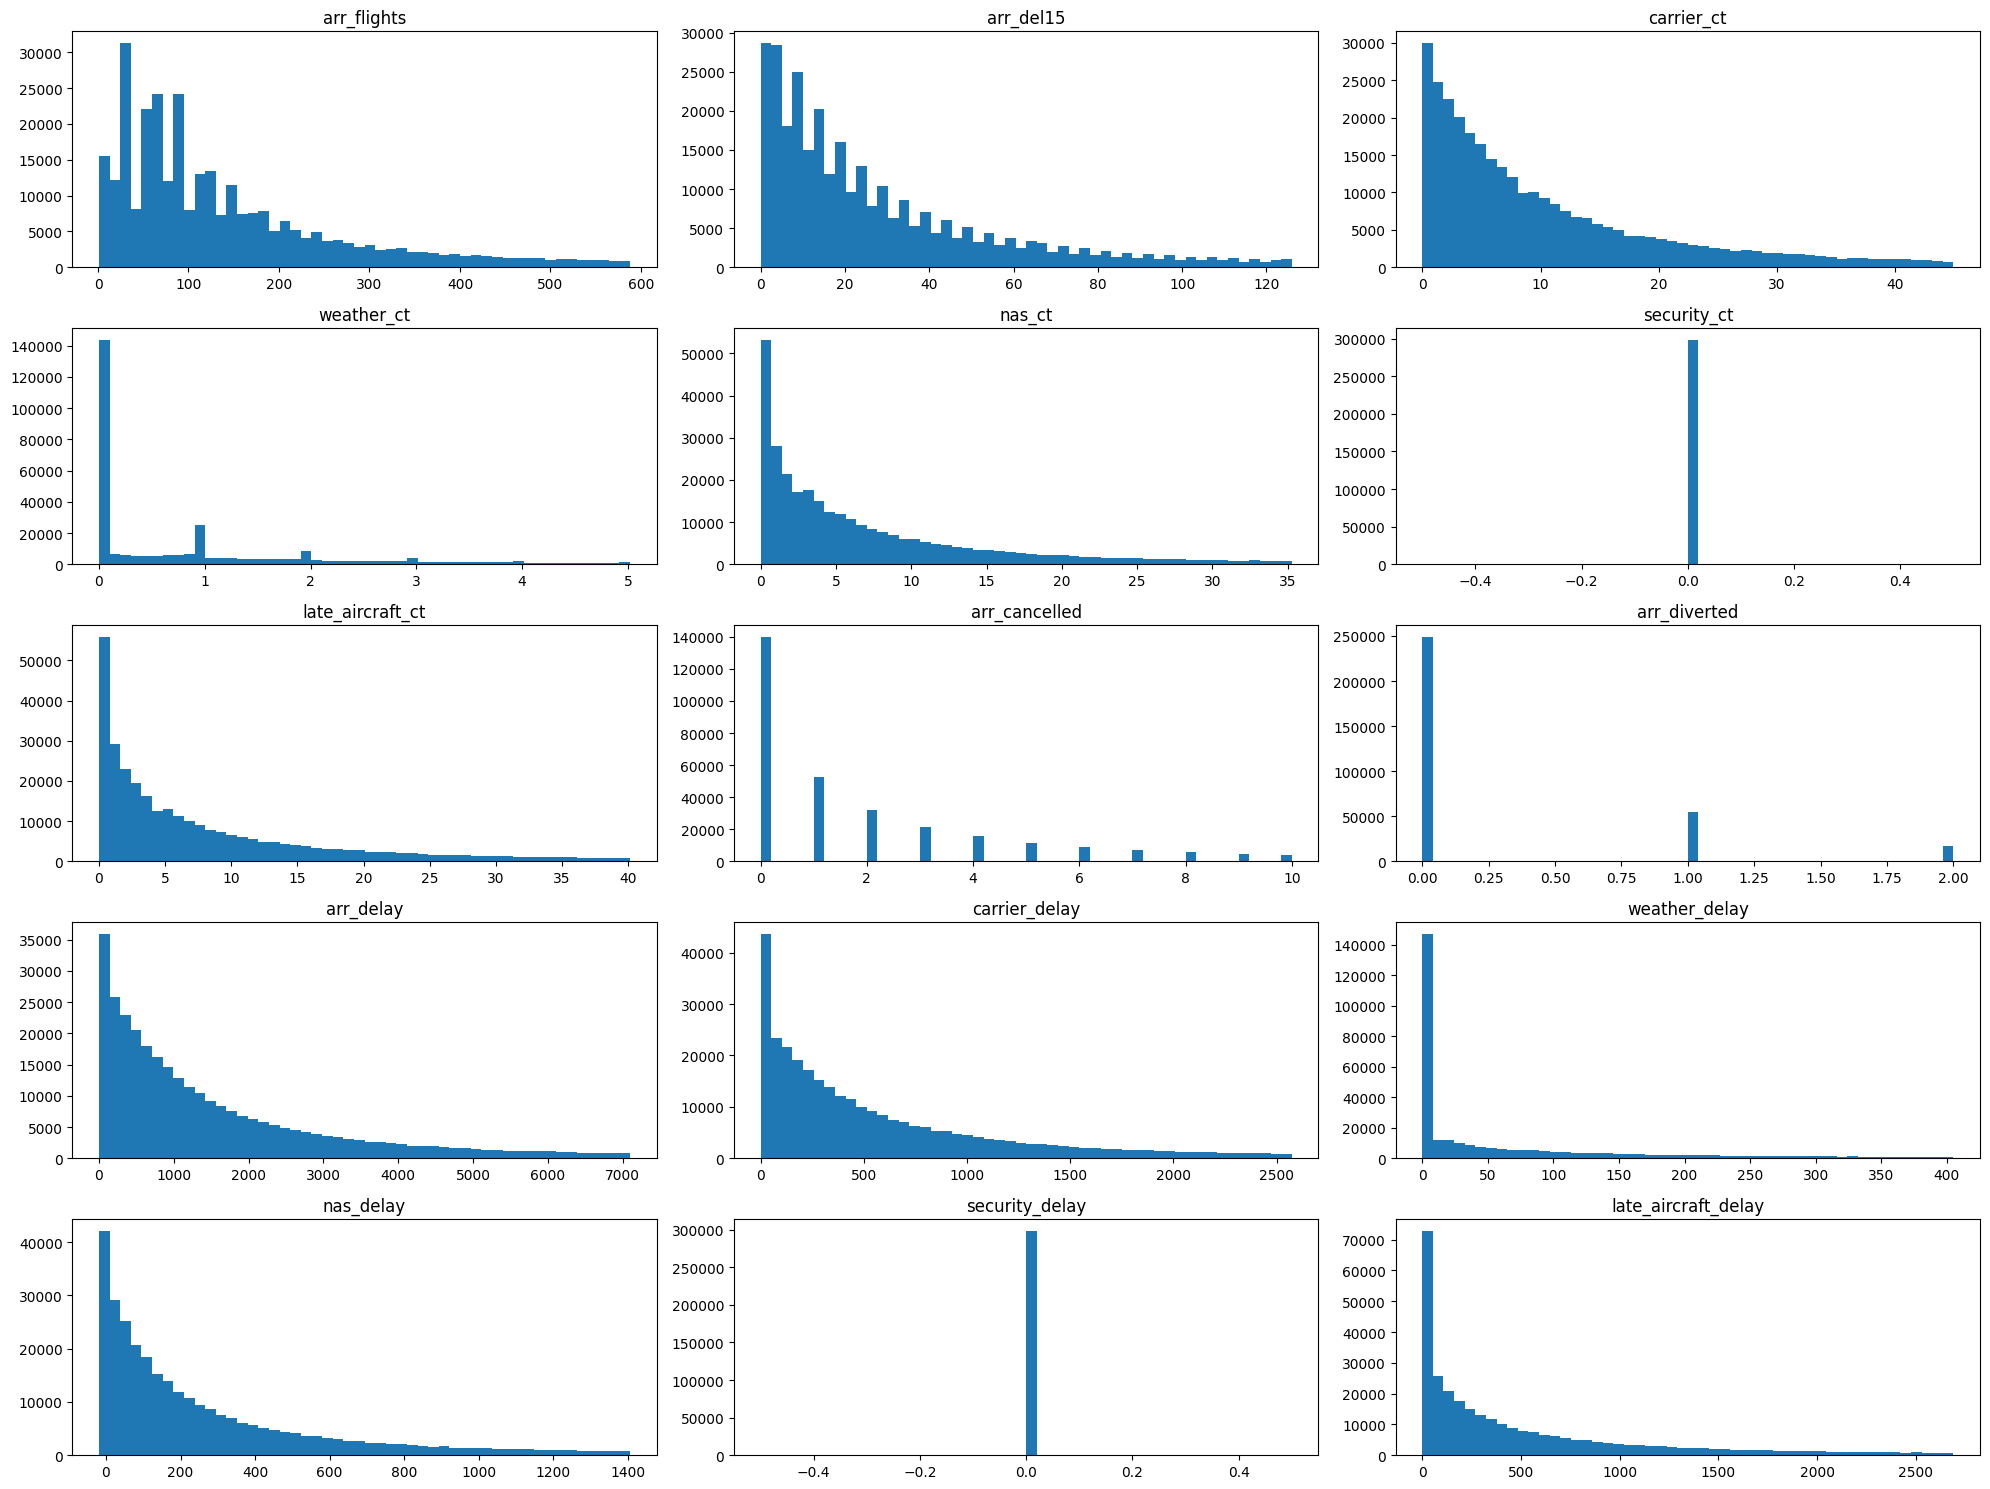

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Select only the numeric columns and drop 'year' and 'month'
df_to_plot = df.select_dtypes(include=['float64', 'int64']).drop(['year', 'month'], axis=1)

# Number of columns for subplot
ncols = 3

# Calculate number of rows needed for subplots
nrows = -(-len(df_to_plot.columns) // ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 15))

# Flatten the axes array and iterate over it and the columns of the DataFrame simultaneously
for ax, column in zip(axs.flatten(), df_to_plot.columns):
    # Calculate IQR
    Q1 = df_to_plot[column].quantile(0.25)
    Q3 = df_to_plot[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Select only non-outlier data
    non_outliers = df_to_plot[column][(df_to_plot[column] >= lower_bound) & (df_to_plot[column] <= upper_bound)]

    ax.hist(non_outliers, bins=50)
    ax.set_title(column)

# Remove any unused subplots
for ax in axs.flatten()[len(df_to_plot.columns):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [56]:
# Print the number of unique values in airport
print(df['airport'].nunique())

# # # Print the unique values in airport name
# # print(df['airport_name'].unique())

# Count the number of unique values in airport_name
print(df['airport_name'].nunique())

420
444


In [55]:
# Print the unique values in airport and airport name. Show the entire list.
print(df[['airport', 'airport_name']].drop_duplicates().to_string(index=False))

airport                                                           airport_name
    ABE            Allentown/Bethlehem/Easton, PA: Lehigh Valley International
    ABY                                 Albany, GA: Southwest Georgia Regional
    AEX                               Alexandria, LA: Alexandria International
    AGS                            Augusta, GA: Augusta Regional at Bush Field
    ALB                                       Albany, NY: Albany International
    ATL                  Atlanta, GA: Hartsfield-Jackson Atlanta International
    AUS                           Austin, TX: Austin - Bergstrom International
    AVL                                      Asheville, NC: Asheville Regional
    AZO                    Kalamazoo, MI: Kalamazoo/Battle Creek International
    BDL                                    Hartford, CT: Bradley International
    BGM                 Binghamton, NY: Greater Binghamton/Edwin A. Link Field
    BGR                                       Bangor